/home/ubuntu/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(256, 256, 3)


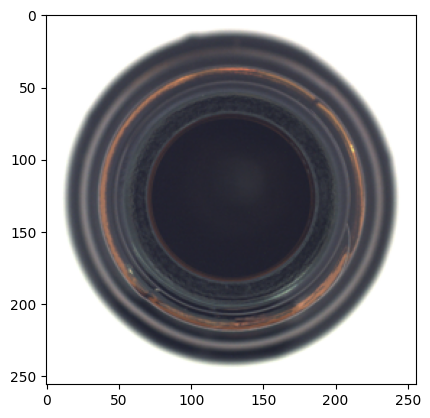

In [1]:
from sklearn.feature_extraction import image, 
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.transforms import ToTensor


x = Image.open('../dataset/bottle/train/good/000.png').resize((256,256)).convert('RGB')
print(np.array(x).shape)
plt.imshow(x)

In [2]:
# input image shape must be (1, 3, imsize, imsize)
# output will be (n_patches, 3, dim_patch, dim_patch)
from torch import Tensor


def extract_patches(image:Tensor, dim=64, stride=32):
    patches = image.unfold(2, dim, stride).unfold(3, dim, stride)
    patches = patches.reshape(1, 3, -1, dim, dim)
    patches = patches.squeeze()
    patches = torch.permute(patches, (1,0,2,3))
    return patches

img = ToTensor()(x)
img = img.unsqueeze(0)
p = extract_patches(img, 32, 4)

In [10]:
stride = 64
dim = 64

# patches = image.extract_patches_2d(np.array(x), (64, 64), max_patches=8)
img = ToTensor()(x)
img = img.unsqueeze(0)
print(img.shape)
patches = img.unfold(2, dim, stride).unfold(3, dim, stride)
print(patches.shape)
patches = patches.reshape(1, 3, -1, dim, dim)
print(patches.shape)
patches = patches.squeeze()
print(patches.shape)
patches = torch.permute(patches, (1,0,2,3))
print(patches.shape)
patches = torch.permute(patches, (0, 3,2,1))
print(patches.shape)

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 4, 4, 64, 64])
torch.Size([1, 3, 16, 64, 64])
torch.Size([3, 16, 64, 64])
torch.Size([16, 3, 64, 64])
torch.Size([16, 64, 64, 3])


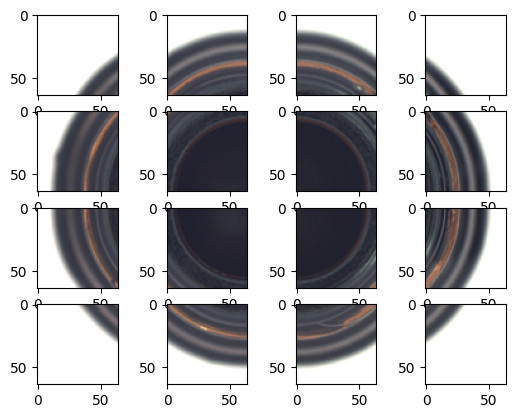

In [11]:
fig, ax = plt.subplots(4,4)
k = 0
for i in range(4):
    for j in range(4):
        ax[j][i].imshow(np.array(patches[k]))
        k += 1

In [ ]:
img = reconstruct_from_patches_2d(patches, imsize)